# Food Image Classification with Hugging Face

<p align="center">
  <img src="Food class_2.png" alt="Food class_2" width="500">
</p>

A popular social media platform dedicated to food enthusiasts wants to improve user engagement by adding advanced image recognition features. As a machine learning engineer, you are tasked with developing a food image classification system using Hugging Face's state-of-the-art models. This system will automatically identify and categorize food items in user-uploaded photos, allowing for better content organization and personalized food content recommendations.

Your responsibility is to develop a robust food category image classification system using pre-trained models from Hugging Face.

The goal is to enhance user interaction by providing accurate food classification, enabling users to easily find and engage with content related to their favorite foods, and improving the overall experience on the platform.

In this dynamic project, we leverage the power of PyTorch and transformers, utilizing an open-source model from Hugging Face as the backbone of our solution.

In [36]:
# Install required libraries
!pip install matplotlib
!pip install pillow
!pip install transformers

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [37]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

from transformers import pipeline
from transformers.utils import logging
# Only show error messages from the transformers library to reduce the amount of log output
logging.set_verbosity_error()

import warnings
# Ignore all Python warnings to keep the output clean
warnings.filterwarnings("ignore")

In [38]:
# Helper function to convert image to RGB format
def convert_to_rgb(image):
    """
    Converts an image to RGB format.

    Parameters:
    image (PIL.Image): An image object.

    Returns:
    PIL.Image: Image object in RGB format.
    """
    return image.convert('RGB')

In [39]:
from huggingface_hub import HfApi
api = HfApi()

In [40]:
# List out models to try
models = api.list_models(
        filter="image-classification",
        sort="downloads",
        direction=-1,
        limit=5)

for model in models:
    print(f"Model: {model.modelId}, Downloads: {model.downloads}")

Model: microsoft/resnet-50, Downloads: 66156682
Model: timm/resnet50.a1_in1k, Downloads: 11996751
Model: timm/efficientformerv2_s2.snap_dist_in1k, Downloads: 5449555
Model: google/vit-base-patch16-224, Downloads: 3228923
Model: timm/efficientnet_b3.ra2_in1k, Downloads: 2675143


In [41]:
# Loading the image
original_image = Image.open("Food Pictures/food_1.png")

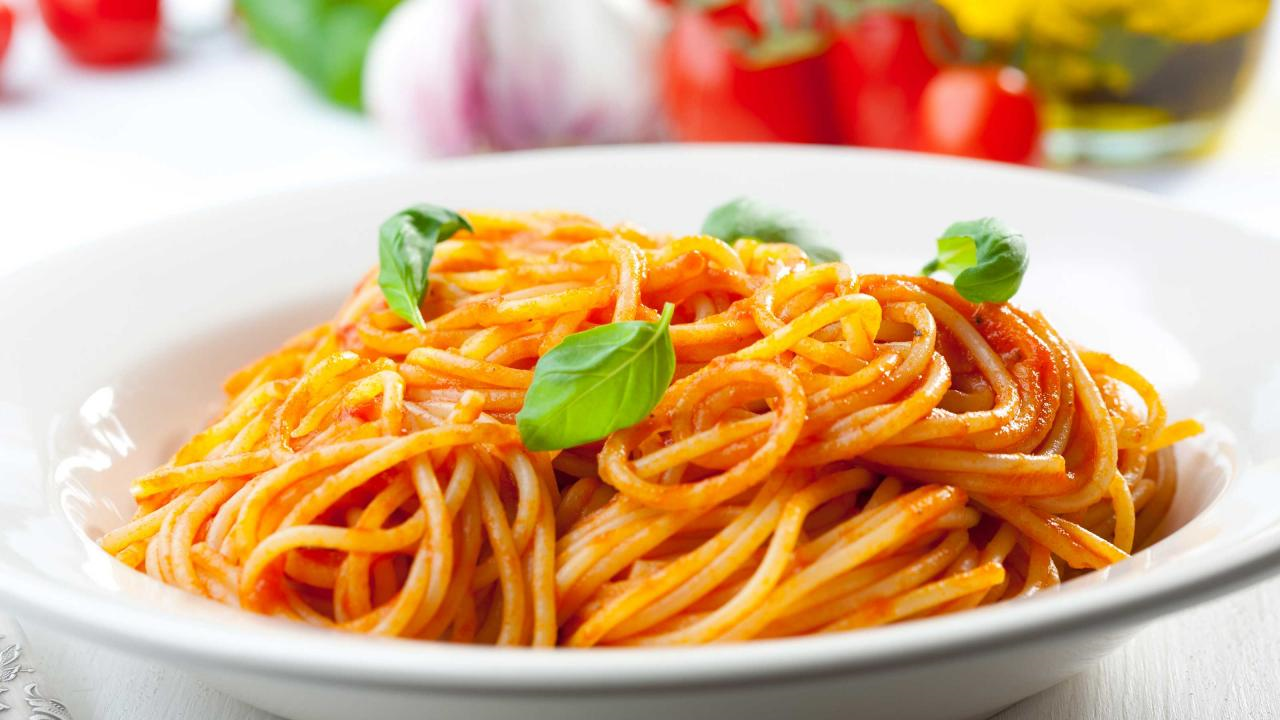

In [42]:
original_image

In [43]:
# Convert image to RGB format
image = convert_to_rgb(original_image)

In [44]:
# Building a classifier
classifier = pipeline(task="image-classification", model="microsoft/resnet-50")

In [45]:
# Use the model to classifier the image
class_scores = classifier(image)

In [46]:
print(class_scores)

[{'score': 0.935531735420227, 'label': 'carbonara'}, {'score': 0.03590348735451698, 'label': 'plate'}, {'score': 0.0014112042263150215, 'label': 'red wine'}, {'score': 0.0013422397896647453, 'label': 'crayfish, crawfish, crawdad, crawdaddy'}, {'score': 0.001265133498236537, 'label': 'hot pot, hotpot'}]


In [47]:
type(class_scores)

list

In [48]:
# Identifying the label of the food category with the highest probability
highest_probability_class = class_scores[0]['label']

In [49]:
type(highest_probability_class)

str